# Breast Cancer Gene Expression Dataset
dataset download link: https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/data

notebook author: Rackkoun

In [ ]:
# Import important ML libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# import utilities libs
import os
import sys
from pathlib import Path

In [2]:
#  Set Workding dir
CURRENT_DIR = Path.cwd()
WORK_DIR = CURRENT_DIR.parents[2]
# add project dir to sys path for custom packages to be available for import
sys.path.insert(0, str(WORK_DIR))
DATA_DIR = os.path.join(WORK_DIR, 'data')
BCGED_CSV = os.path.join(DATA_DIR, os.path.join("files", "METABRIC_RNA_Mutation.csv"))
# check if utils dir exists
os.path.exists(os.path.join(WORK_DIR, "utils"))

True

In [3]:
# import custom data viz config
import utils.dataviz_utils as custum_viz
# custum_viz.set_palette('blue_seq')

[^v^] Seaborn configured with style: 'darkgrid', context: 'notebook'
[°-°] Matplotlib rcParams configured


/home/rackkoun/Documents/Workspaces/neuefishe/projects/self-learnings-repos/TASK-DataScience-Toolkit/utils/dataviz_utils/styles.py:118: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


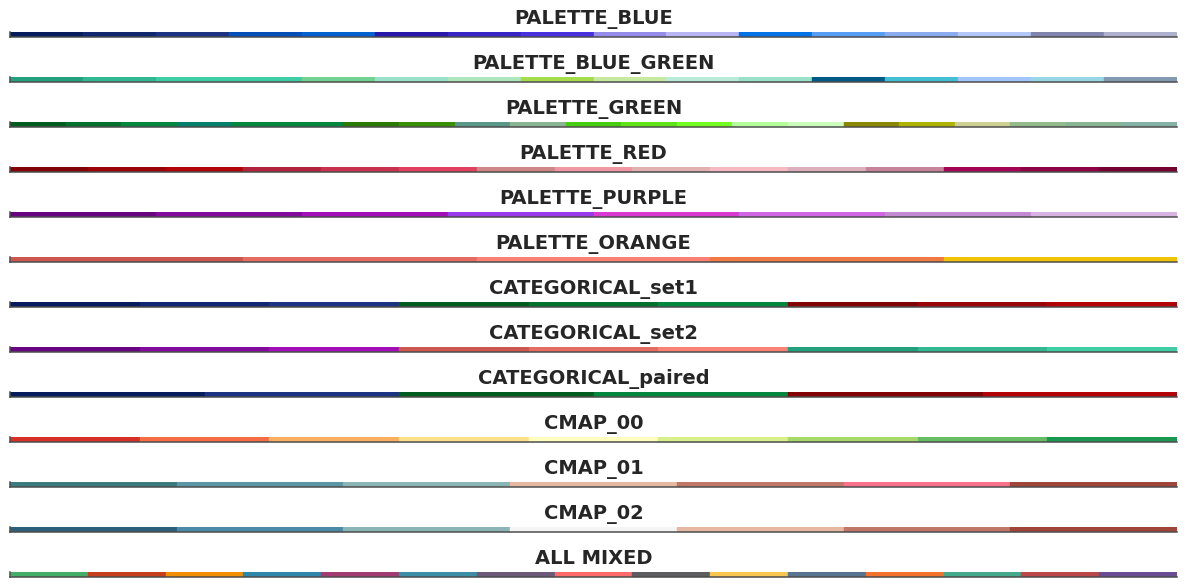

In [4]:
custum_viz.preview_all_palettes()

In [ ]:
# load the datasets
bcde_df = pd.read_csv(BCGED_CSV)

/tmp/ipykernel_324195/1288212076.py:3: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  bcde_df = pd.read_csv(BCGED_CSV)


__Goal__:

Patient survival rate

- do young person have a high percentage for surviving to BC?
- which cancer type cause most dead

In [ ]:
# slice the dataset to only take columns we want to work with
bcde_df_00 = bcde_df.iloc[:, :31]
bcde_df_00.head(3)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease


In [37]:
bcde_df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [36]:
missing_values_pct = round(bcde_df.isnull().sum() * 100 / len(bcde_df), 2)
missing_values_pct.sort_values(ascending=False).nlargest(15)

tumor_stage                       26.31
3-gene_classifier_subtype         10.71
primary_tumor_laterality           5.57
neoplasm_histologic_grade          3.78
cellularity                        2.84
mutation_count                     2.36
er_status_measured_by_ihc          1.58
type_of_breast_surgery             1.16
tumor_size                         1.05
oncotree_code                      0.79
tumor_other_histologic_subtype     0.79
cancer_type_detailed               0.79
death_from_cancer                  0.05
akr1c1                             0.00
akr1c2                             0.00
dtype: float64

In [38]:
bcde_df_00.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.493800,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,0.000000,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


In [39]:
bcde_df_00.isna()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [27]:
bcde_df.isna().sum().sum()#sort_values(ascending=False)

np.int64(1100)

<Axes: >

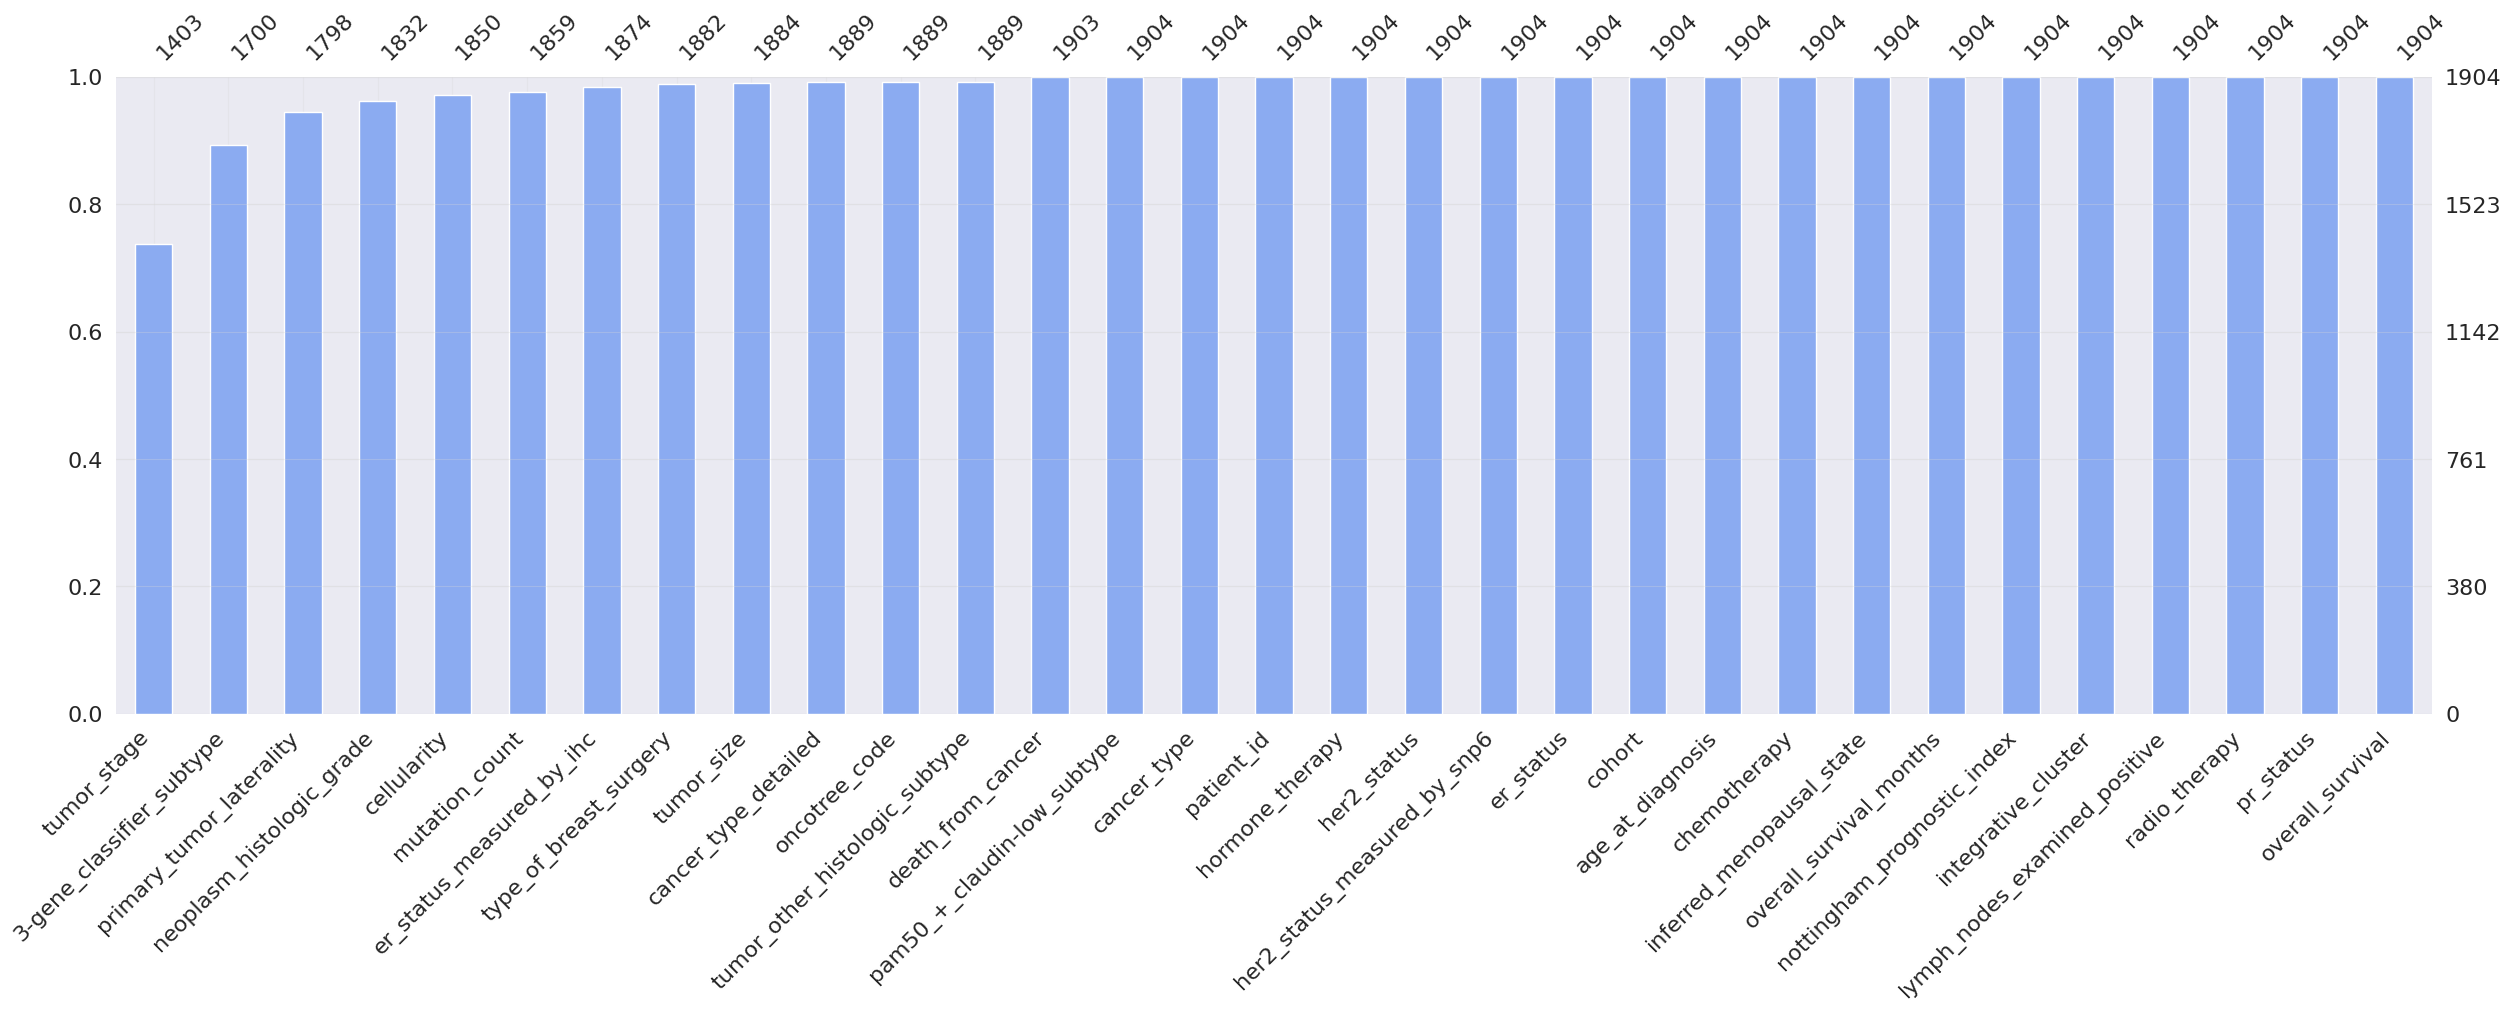

In [16]:
msno.bar(bcde_df_00, sort="ascending", color=custum_viz.PALETTE_BLUE[3])

In [ ]:
# look at all rows with missing values: 812 entries
bcde_df_00[bcde_df_00.isna().any(axis=1)]

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.020,IDC,164.333333,1,Positive,1,NaN,10.0,2.0,Living
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,4.058,MDLC,99.533333,0,Negative,1,NaN,29.0,2.0,Died of Other Causes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


<Axes: >

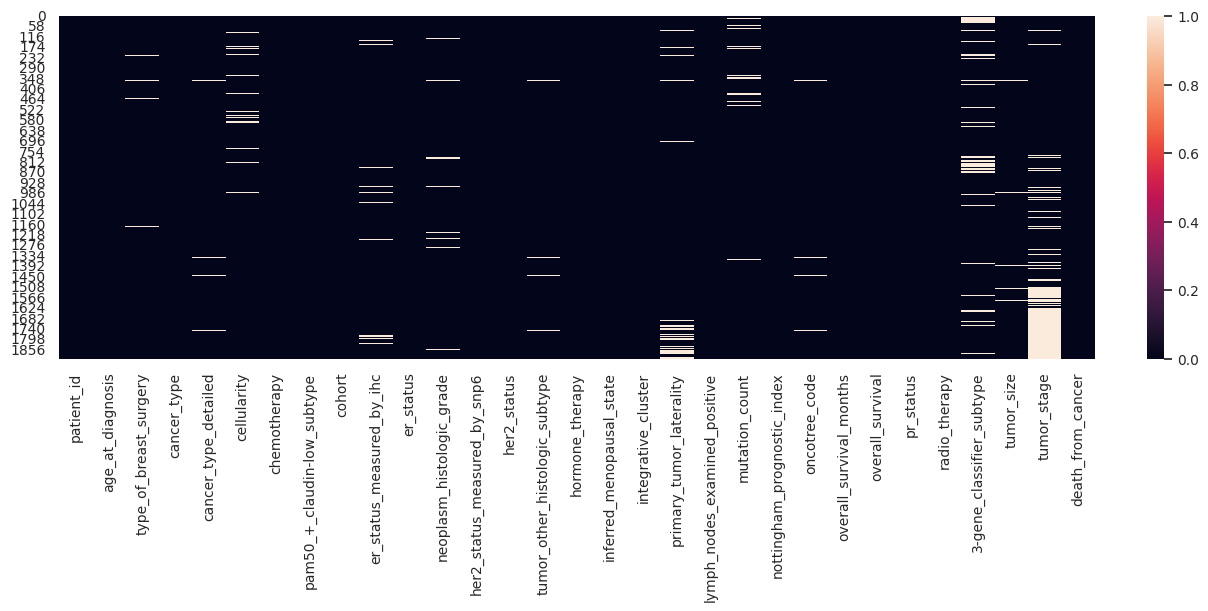

In [20]:
sns.heatmap(bcde_df_00.isna())

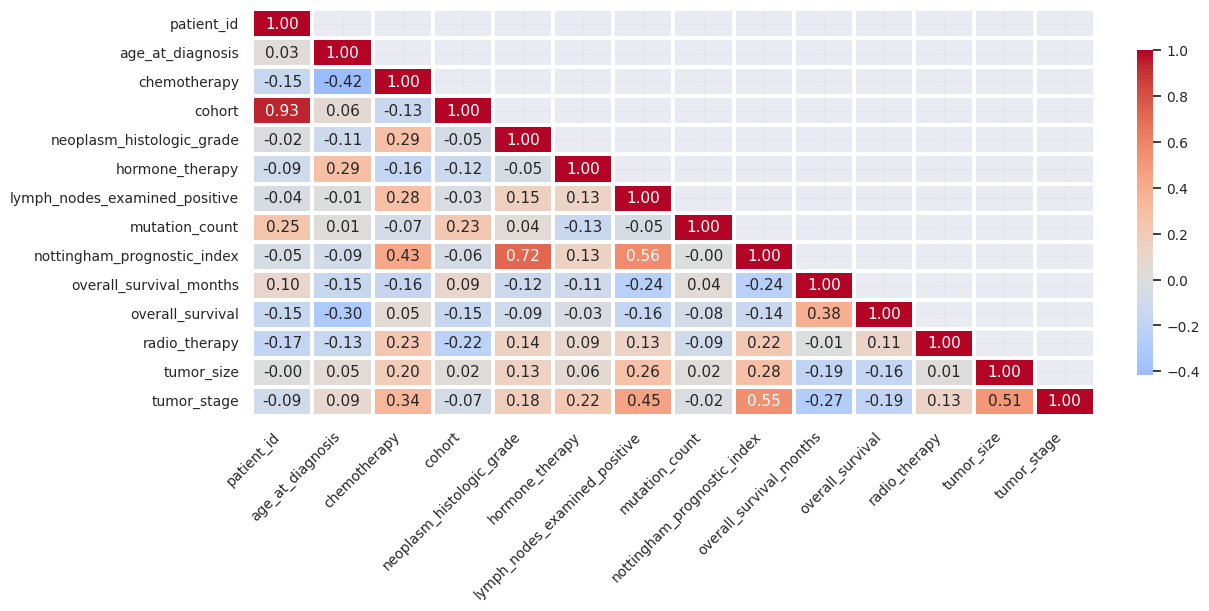

In [39]:
corr_matrix_df = bcde_df_00.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix_df, dtype=bool), k=1)
sns.heatmap(
    corr_matrix_df, annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    mask=mask,
    linewidths=1.5,
    cbar_kws={'shrink': 0.8}
)
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
bcde_df_00.cancer_type.unique()

array(['Breast Cancer', 'Breast Sarcoma'], dtype=object)

/home/rackkoun/Documents/Workspaces/neuefishe/projects/self-learnings-repos/TASK-DataScience-Toolkit/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


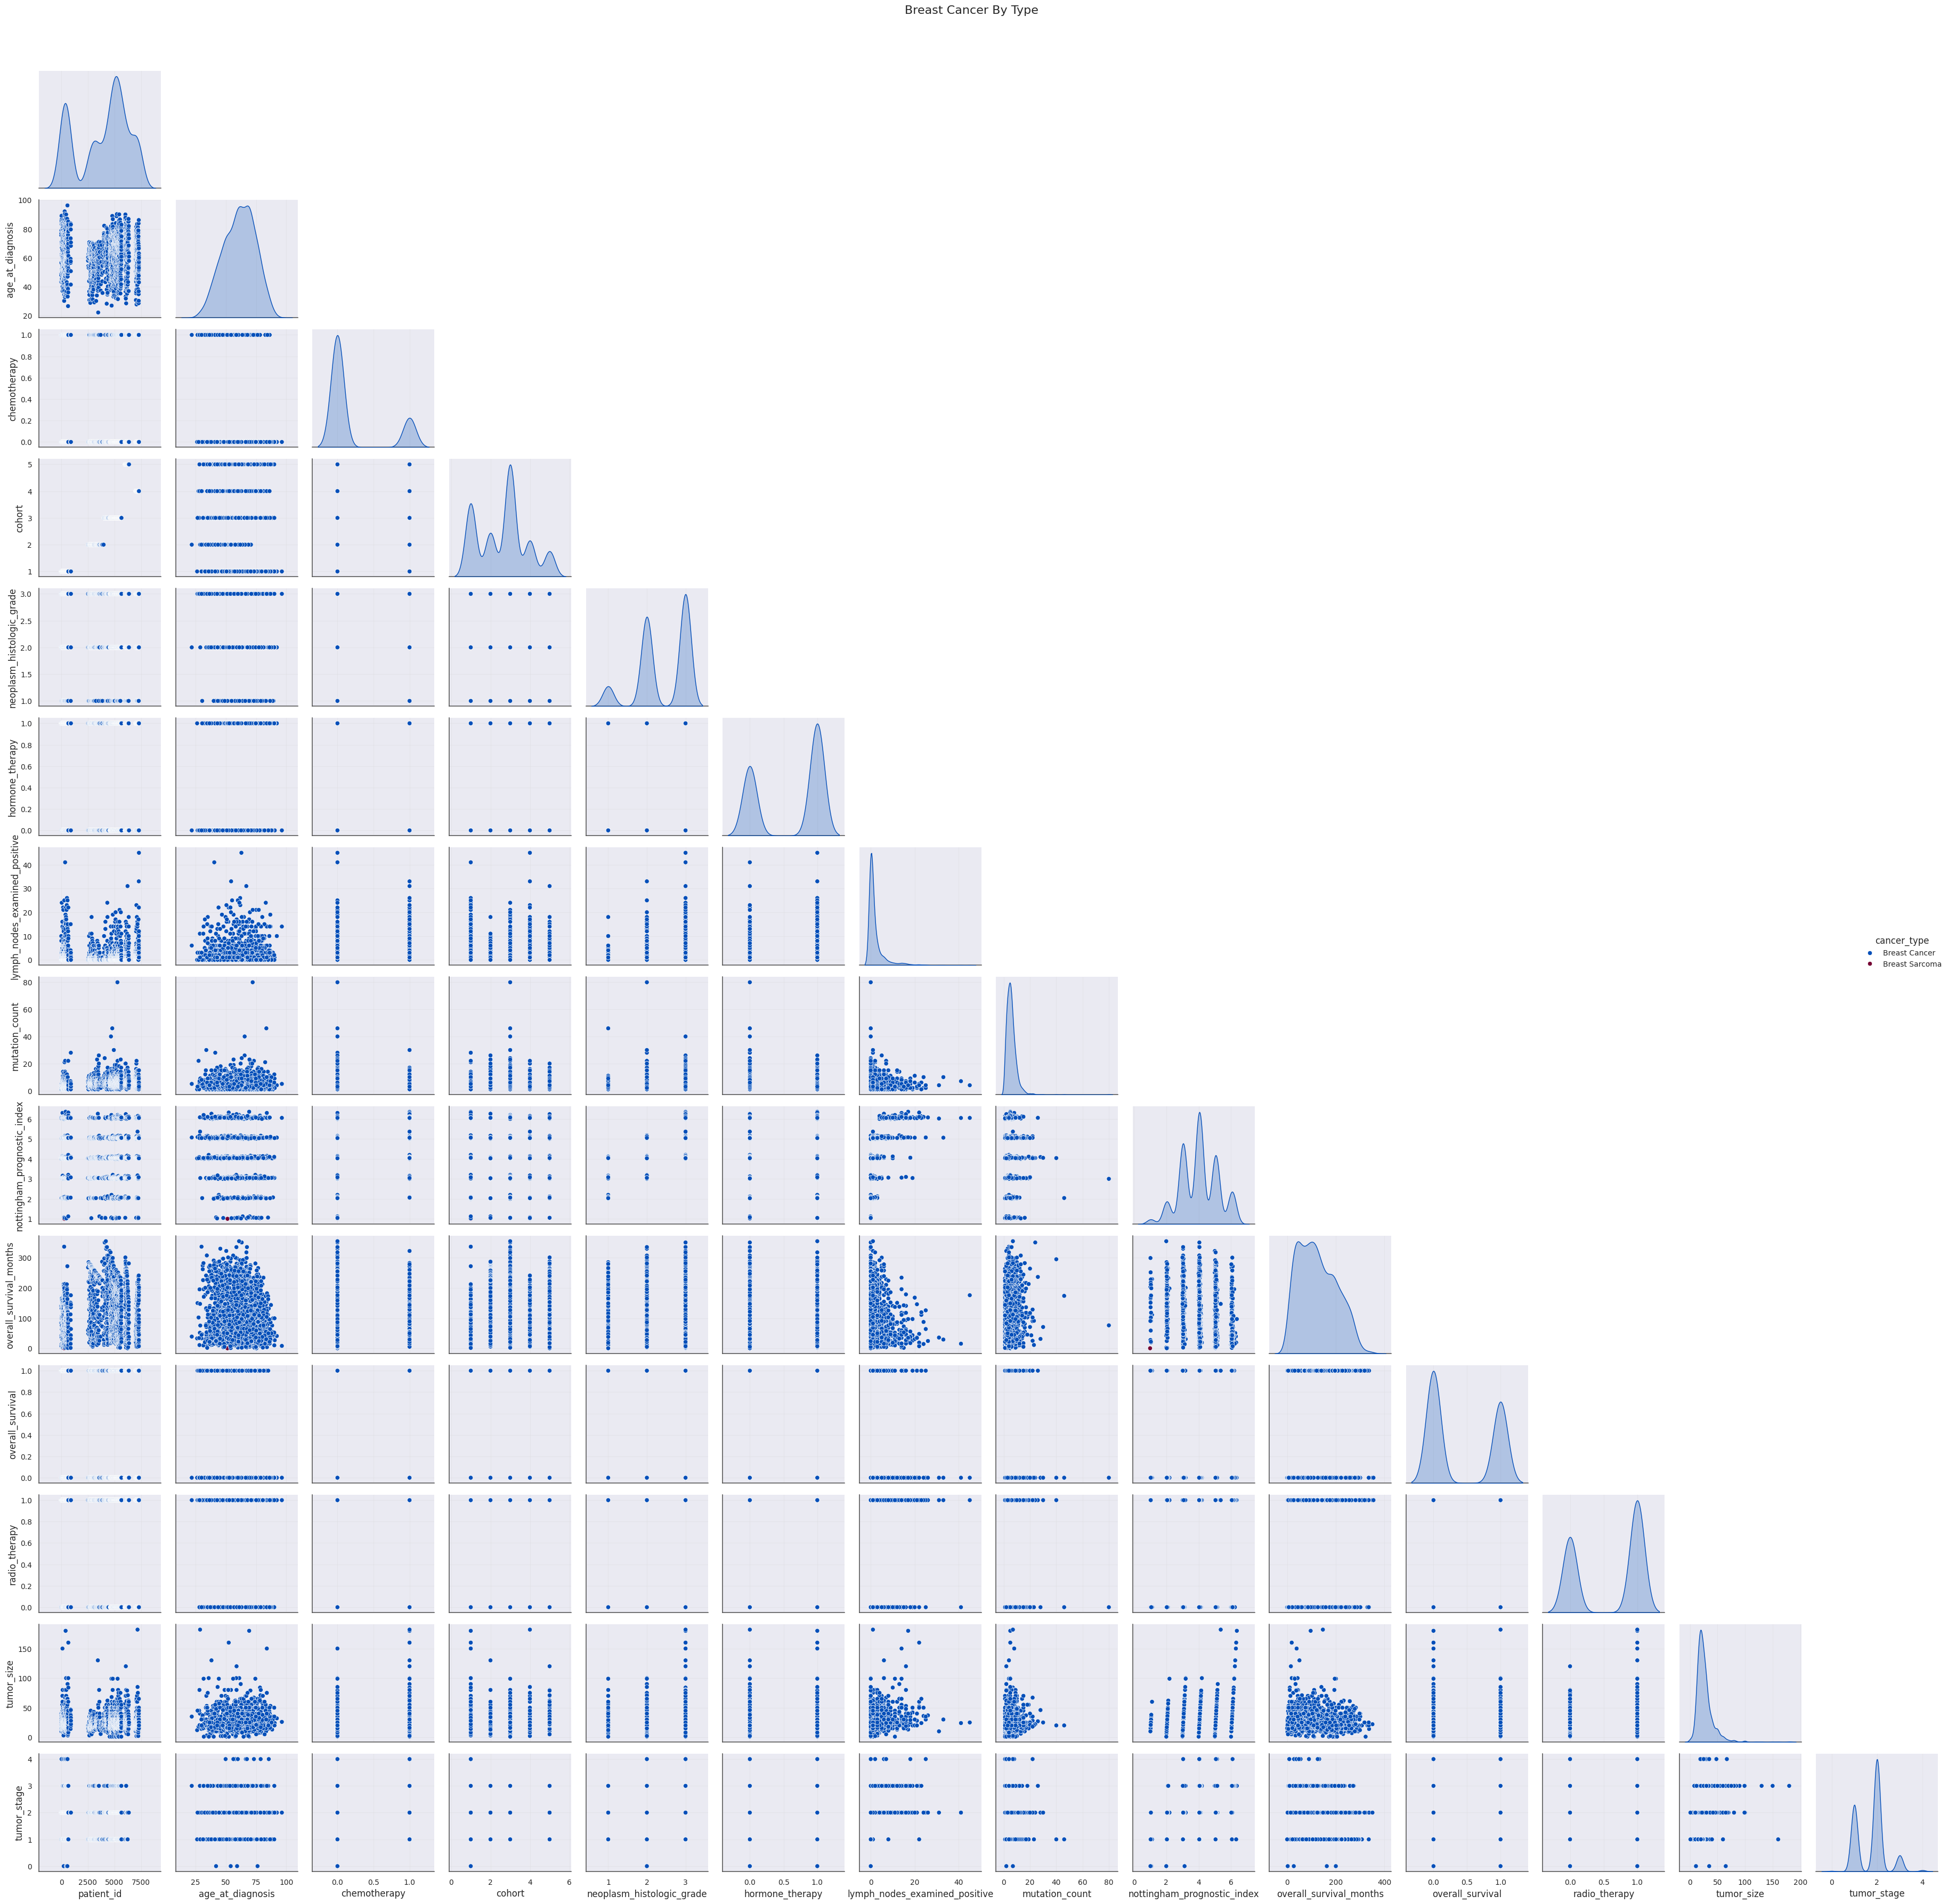

In [53]:
numerical_cols_name = bcde_df_00.select_dtypes(include=np.number).columns.tolist()
all_cat_cols =  bcde_df_00.columns.drop(numerical_cols_name)
# all_cat_cols
pairplot_fig = sns.pairplot(
    bcde_df_00,
    corner=True, diag_kind='kde',
    hue='cancer_type',
    palette={
        'Breast Cancer': custum_viz.PALETTE_BLUE[0],
        'Breast Sarcoma': custum_viz.PALETTE_RED[0]
    }
)
pairplot_fig.figure.suptitle("Breast Cancer By Type", y=1.02)
plt.tight_layout()
plt.show()